<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/machine_learning/unsupervised_learning/clustering/k_means_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means: Segmentacja obrazu
Instalacja biblioteki OpenCV:

In [1]:
!pip install opencv-python

Aktualizacja do najnowszej wersji biblioteki OpenCV:

In [2]:
!pip install --upgrade opencv-python

     |████████████████████████████████| 28.2MB 89.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


### Import bibliotek

In [0]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

### Pobranie obrazów

In [5]:
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/green.jpg
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/ski.jpg
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/view.jpg

--2020-03-13 02:42:22--  https://storage.googleapis.com/esmartdata-courses-files/ml-course/green.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c15::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12300 (12K) [image/jpeg]
Saving to: ‘green.jpg’

green.jpg           100%[===================>]  12.01K  --.-KB/s    in 0s      

2020-03-13 02:42:23 (131 MB/s) - ‘green.jpg’ saved [12300/12300]

--2020-03-13 02:42:24--  https://storage.googleapis.com/esmartdata-courses-files/ml-course/ski.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71376 (70K) [image/jpeg]
Saving to: ‘ski.jpg’

ski.jpg             100%[===================>]  69.

### Eksploracja

In [9]:
img = cv2.imread('ski.jpg')
img.shape

(460, 600, 3)

In [10]:
img

array([[[143, 100,  67],
        [143, 100,  67],
        [144, 101,  68],
        ...,
        [135,  95,  66],
        [132,  92,  63],
        [131,  91,  62]],

       [[144, 101,  68],
        [145, 102,  69],
        [145, 102,  69],
        ...,
        [133,  93,  64],
        [131,  91,  62],
        [129,  89,  60]],

       [[146, 103,  70],
        [146, 103,  70],
        [146, 103,  70],
        ...,
        [131,  93,  63],
        [130,  91,  63],
        [129,  90,  62]],

       ...,

       [[244, 244, 244],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [233, 233, 233],
        [237, 235, 235],
        [239, 237, 237]],

       [[244, 244, 244],
        [246, 246, 246],
        [248, 248, 248],
        ...,
        [233, 233, 233],
        [236, 236, 236],
        [240, 240, 240]],

       [[245, 245, 245],
        [247, 247, 247],
        [249, 249, 249],
        ...,
        [233, 233, 233],
        [237, 237, 237],
        [241, 241, 241]]

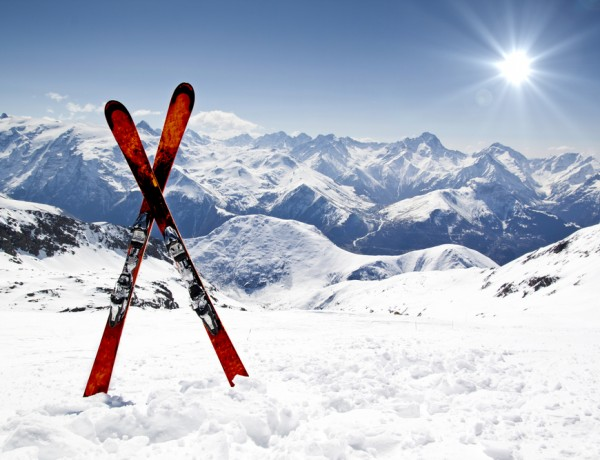

In [11]:
cv2_imshow(img)

In [12]:
# przygotowanie obrazu do modelu
img_data = img.reshape((-1, 3))
img_data = np.float32(img_data)
img_data.shape

(276000, 3)

In [14]:
df = pd.DataFrame(data=img_data, columns=['dim1', 'dim2', 'dim3'])
df.head(3)

,dim1,dim2,dim3
0,143.0,100.0,67.0
1,143.0,100.0,67.0
2,144.0,101.0,68.0


### K-Means

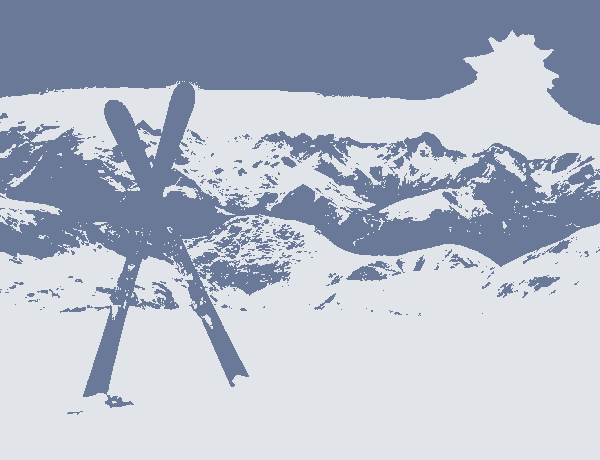

In [20]:
_, label, center = cv2.kmeans(
    data=img_data,  # float32 data type
    K=2,            # liczba klastrów
    bestLabels=None,
    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
    attempts=10,    # liczba uruchomień algorytmu
    flags=cv2.KMEANS_RANDOM_CENTERS)  # określenie inicjalizacji centroidów

center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((img.shape))
cv2_imshow(res)

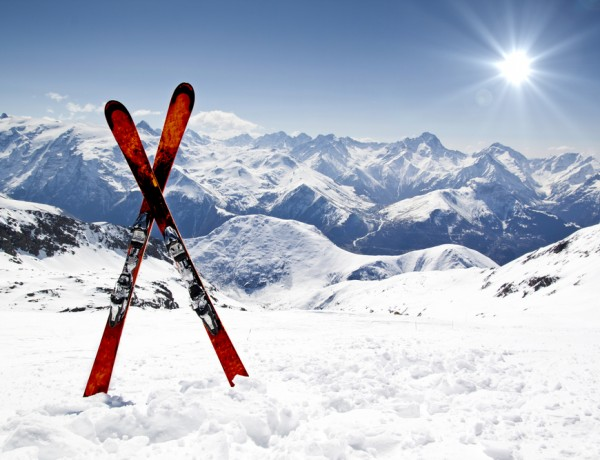

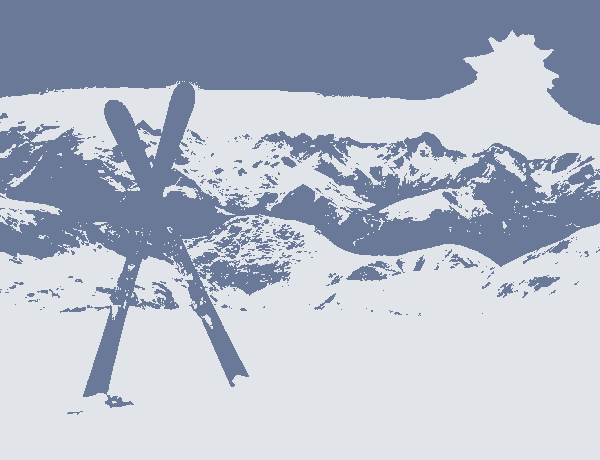

In [32]:
def make_kmeans(n_neighbor=2, img_name='ski.jpg'):

  # wczytane zdjęcia
  img = cv2.imread(img_name)
  cv2_imshow(img)

  # przygotowane zdjęcia
  img_data = img.reshape((-1, 3))
  img_data = np.float32(img_data)

  # kmeans
  _, label, center = cv2.kmeans(
      data=img_data,  # float32 data type
      K=2,            # liczba klastrów
      bestLabels=None,
      criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
      attempts=10,    # liczba uruchomień algorytmu
      flags=cv2.KMEANS_RANDOM_CENTERS)  # określenie inicjalizacji centroidów

  # przygotowanie do wyświetlenia
  center = np.uint8(center)
  res = center[label.flatten()]
  res = res.reshape((img.shape))
  cv2_imshow(res)

make_kmeans()

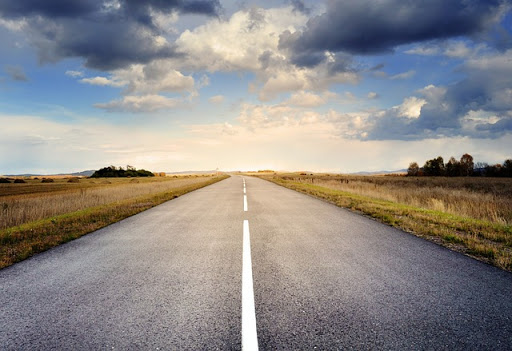

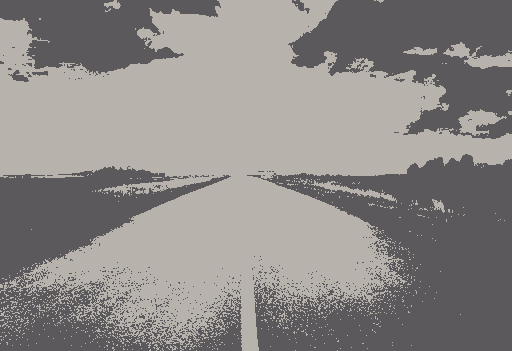

In [33]:
make_kmeans(3, img_name='view.jpg')

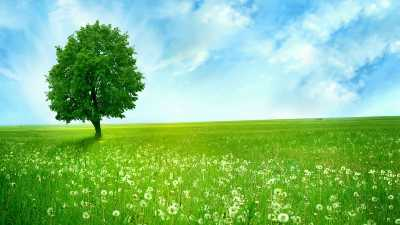

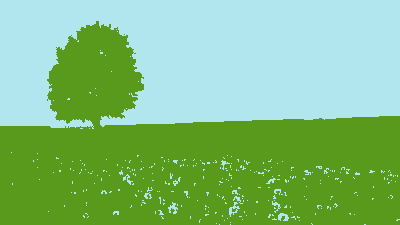

In [34]:
make_kmeans(3, img_name='green.jpg')